<a href="https://colab.research.google.com/github/Ajay-user/ML-DL-RL-repo/blob/master/Image%20Classification/Getting_the_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Loading mnist data

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## Model parameters

In [3]:
BATCH_SIZE = 128
EPOCHS = 10
STEP_PER_EPOCH = 60000//BATCH_SIZE  # 60,000 items in this dataset

## Preprocessing and ploting utils

In [51]:
# scaling
X_train = x_train/255.0
X_test = x_test/255.0


# create an utility for training dataset
def create_training_ds(X,y,batch_size=BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((X,y))
  # this small dataset can be entirely cached in RAM
  ds = ds.cache()
  # training set should be well shuffled
  ds = ds.shuffle(buffer_size=5000)
  # repeat the dataset
  ds = ds.repeat()
  # create batches
  ds = ds.batch(batch_size=batch_size, drop_remainder=True)
  # fetch next batches while training on the current one 
  ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)
  return ds

# create an utility for evaluation dataset
def create_eval_ds(X,y,batch_size=BATCH_SIZE):
  ds = tf.data.Dataset.from_tensor_slices((X,y))
  # this small dataset can be entirely cached in RAM
  ds = ds.cache()
  # repeat the dataset
  ds = ds.repeat()
  # create batches
  ds = ds.batch(batch_size=batch_size, drop_remainder=True)
  return ds

# create an util for plotting 
def plot_model(history):
  for i, metric in enumerate(['loss', 'accuracy']):
    ax = plt.subplot(2,2,i+1)
    ax.plot(history.history[metric])
    plt.title(metric)

    ax = plt.subplot(2,2,i+3)
    ax.plot(history.history['val_'+metric])
    plt.title('val_'+metric)

  plt.subplots_adjust(wspace=0.4,hspace=0.5)
  plt.show()

Training and evaluation dataset

In [5]:
train_ds = create_training_ds(X_train, y_train)
eval_ds = create_eval_ds(X_test, y_test)

## Model-1 : Single layer with 10 units

In [15]:
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(units=10, activation='softmax')
])

model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model_1.fit(train_ds, steps_per_epoch=STEP_PER_EPOCH, epochs=EPOCHS, validation_data=eval_ds, validation_steps=100)

Epoch 1/10
468/468 [==============================] - 2s 3ms/step - loss: 0.6945 - accuracy: 0.8277 - val_loss: 0.4071 - val_accuracy: 0.8913
Epoch 2/10
468/468 [==============================] - 2s 3ms/step - loss: 0.3644 - accuracy: 0.9019 - val_loss: 0.3410 - val_accuracy: 0.9039
Epoch 3/10
468/468 [==============================] - 2s 4ms/step - loss: 0.3212 - accuracy: 0.9118 - val_loss: 0.3169 - val_accuracy: 0.9096
Epoch 4/10
468/468 [==============================] - 2s 4ms/step - loss: 0.3006 - accuracy: 0.9166 - val_loss: 0.3044 - val_accuracy: 0.9148
Epoch 5/10
468/468 [==============================] - 2s 4ms/step - loss: 0.2893 - accuracy: 0.9201 - val_loss: 0.2974 - val_accuracy: 0.9182
Epoch 6/10
468/468 [==============================] - 2s 4ms/step - loss: 0.2799 - accuracy: 0.9223 - val_loss: 0.2906 - val_accuracy: 0.9180
Epoch 7/10
468/468 [==============================] - 2s 4ms/step - loss: 0.2737 - accuracy: 0.9236 - val_loss: 0.2881 - val_accuracy: 0.9202
Epoch 

## Evaluate the model

In [17]:
loss, accuracy = model_1.evaluate(eval_ds, steps=100)
print('Loss',loss)
print('Accuracy',accuracy)

100/100 [==============================] - 0s 3ms/step - loss: 0.2831 - accuracy: 0.9203
Loss 0.28309887647628784
Accuracy 0.9203125238418579


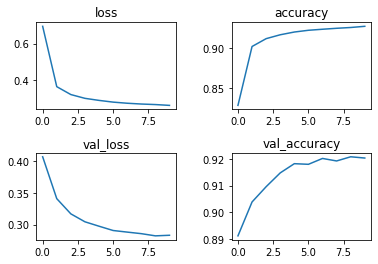

In [52]:
# lets plot the model
plot_model(history)

## Model-2 : Multilayer Neural network

In [48]:
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(units=128, activation='relu'),
                               tf.keras.layers.Dense(units=64, activation='relu'),
                               tf.keras.layers.Dense(units=32, activation='relu'),
                               tf.keras.layers.Dense(units=10, activation='softmax')
])

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
history_2 = model_2.fit(train_ds, epochs=EPOCHS, steps_per_epoch=STEP_PER_EPOCH, validation_data=eval_ds, validation_steps=100)

Epoch 1/10
468/468 [==============================] - 4s 6ms/step - loss: 0.3477 - accuracy: 0.8996 - val_loss: 0.1758 - val_accuracy: 0.9496
Epoch 2/10
468/468 [==============================] - 3s 6ms/step - loss: 0.1343 - accuracy: 0.9602 - val_loss: 0.1204 - val_accuracy: 0.9648
Epoch 3/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0932 - accuracy: 0.9720 - val_loss: 0.1029 - val_accuracy: 0.9699
Epoch 4/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0708 - accuracy: 0.9783 - val_loss: 0.0957 - val_accuracy: 0.9709
Epoch 5/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0917 - val_accuracy: 0.9726
Epoch 6/10
468/468 [==============================] - 3s 6ms/step - loss: 0.0451 - accuracy: 0.9861 - val_loss: 0.0933 - val_accuracy: 0.9725
Epoch 7/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0381 - accuracy: 0.9882 - val_loss: 0.0971 - val_accuracy: 0.9729
Epoch 

In [50]:
# let's check the performance on eval ds
loss,accuracy = model_2.evaluate(eval_ds, steps=100)
print('Loss',loss)
print('Accuracy',accuracy)

100/100 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.9773
Loss 0.09393960237503052
Accuracy 0.977343738079071


Training accuracy around 99% and validation around 97% <br>
Are we overfitting the training data? 


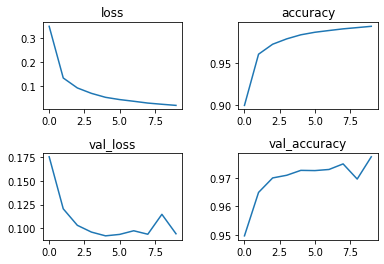

In [53]:
# let plot the learning 
plot_model(history_2)

We are overfitting the trainig data 

How can we make our model more general ?
* use Dropout
* use weight regularization techniques like L1 and L2
* use a Simple model
* Reduce the learing rate
* Early stopping

Let's use Dropout and a decaying learning rate

## Model-3 : Multiple layers with dropout regularization & decaying learing rate

In [54]:
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Flatten(),
                               tf.keras.layers.Dense(units=128, activation='relu'),
                               tf.keras.layers.Dropout(rate=0.2),

                               tf.keras.layers.Dense(units=64, activation='relu'),
                               tf.keras.layers.Dropout(rate=0.2),

                               tf.keras.layers.Dense(units=32, activation='relu'),
                               tf.keras.layers.Dropout(rate=0.2),

                               tf.keras.layers.Dense(units=10, activation='softmax')
])

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Text(0.5, 0, 'Epochs')

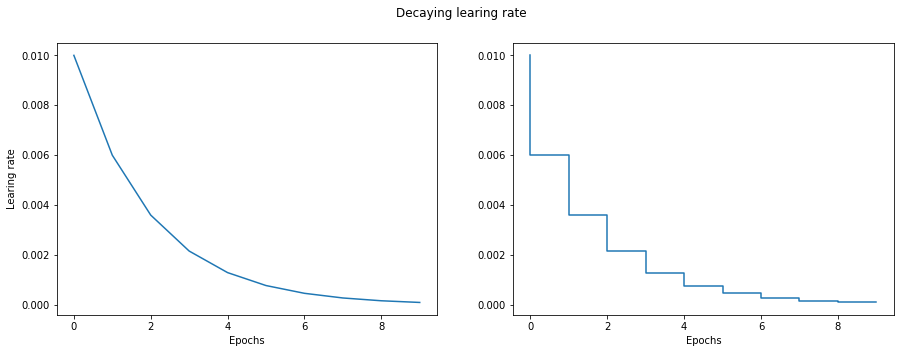

In [75]:
import math
# decaying learing rate
def decay_lr(epoch):
  return 0.01*math.pow(0.6,epoch)

# lets view the decay
decay = []
for epoch in range(EPOCHS):
  decay.append(decay_lr(epoch))

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(decay);
plt.xlabel('Epochs')
plt.ylabel('Learing rate')
plt.suptitle('Decaying learing rate');
plt.subplot(1,2,2)
plt.step(range(len(decay)), decay)
plt.xlabel('Epochs')

In [62]:
from gc import callbacks
# lets use these to train our model
lr = tf.keras.callbacks.LearningRateScheduler(decay_lr)
history_3 = model_3.fit(train_ds,
                        epochs=EPOCHS,
                        steps_per_epoch=STEP_PER_EPOCH,
                        validation_data=eval_ds,
                        validation_steps=100,
                        callbacks=[lr])

Epoch 1/10
468/468 [==============================] - 4s 9ms/step - loss: 0.3654 - accuracy: 0.8984 - val_loss: 0.1966 - val_accuracy: 0.9452 - lr: 0.0100
Epoch 2/10
468/468 [==============================] - 4s 8ms/step - loss: 0.2092 - accuracy: 0.9429 - val_loss: 0.1513 - val_accuracy: 0.9578 - lr: 0.0060
Epoch 3/10
468/468 [==============================] - 3s 7ms/step - loss: 0.1548 - accuracy: 0.9584 - val_loss: 0.1307 - val_accuracy: 0.9656 - lr: 0.0036
Epoch 4/10
468/468 [==============================] - 3s 7ms/step - loss: 0.1252 - accuracy: 0.9652 - val_loss: 0.1148 - val_accuracy: 0.9703 - lr: 0.0022
Epoch 5/10
468/468 [==============================] - 3s 6ms/step - loss: 0.1057 - accuracy: 0.9705 - val_loss: 0.1096 - val_accuracy: 0.9707 - lr: 0.0013
Epoch 6/10
468/468 [==============================] - 3s 7ms/step - loss: 0.0936 - accuracy: 0.9736 - val_loss: 0.1057 - val_accuracy: 0.9735 - lr: 7.7760e-04
Epoch 7/10
468/468 [==============================] - 3s 7ms/step 

In [64]:
# lets evaluate
loss, accuracy = model_3.evaluate(eval_ds, steps=100)
print('Loss',loss)
print('Accuracy', accuracy)

100/100 [==============================] - 0s 4ms/step - loss: 0.1021 - accuracy: 0.9738
Loss 0.10210952907800674
Accuracy 0.973828136920929


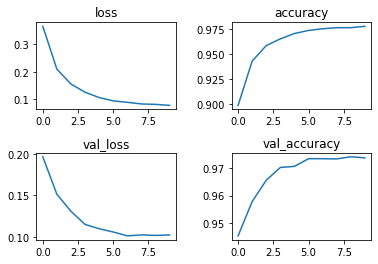

In [87]:
# lets plot the model 
plot_model(history_3)

In Image domain we've CNN.
Convolutional neural networks are excellent feature extractors. Can we use CNN here to get more powerful results?

## Model-4 : Convolutional Neural Nets

In [86]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=12, kernel_size=3, strides=1, padding='same'),
    tf.keras.layers.Conv2D(filters=24, kernel_size=6, strides=2, padding='same'),
    tf.keras.layers.Conv2D(filters=32, kernel_size=6, strides=2, padding='same'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')                        
])

model_4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [88]:
history_4 = model_4.fit(train_ds,
                        epochs=EPOCHS,
                        steps_per_epoch=STEP_PER_EPOCH,
                        validation_data=eval_ds,
                        validation_steps=100
                        )

Epoch 1/10
468/468 [==============================] - 70s 148ms/step - loss: 0.2953 - accuracy: 0.9138 - val_loss: 0.1975 - val_accuracy: 0.9455
Epoch 2/10
468/468 [==============================] - 70s 150ms/step - loss: 0.1640 - accuracy: 0.9512 - val_loss: 0.1520 - val_accuracy: 0.9551
Epoch 3/10
468/468 [==============================] - 69s 147ms/step - loss: 0.1362 - accuracy: 0.9600 - val_loss: 0.1531 - val_accuracy: 0.9566
Epoch 4/10
468/468 [==============================] - 68s 146ms/step - loss: 0.1226 - accuracy: 0.9630 - val_loss: 0.1358 - val_accuracy: 0.9613
Epoch 5/10
468/468 [==============================] - 68s 146ms/step - loss: 0.1120 - accuracy: 0.9662 - val_loss: 0.1245 - val_accuracy: 0.9652
Epoch 6/10
468/468 [==============================] - 68s 146ms/step - loss: 0.1013 - accuracy: 0.9694 - val_loss: 0.1269 - val_accuracy: 0.9635
Epoch 7/10
468/468 [==============================] - 68s 145ms/step - loss: 0.0969 - accuracy: 0.9710 - val_loss: 0.1298 - val_ac

In [91]:
# lets evaluate
loss, accuracy = model_4.evaluate(eval_ds, steps=100)
print('Loss',loss)
print('Accuracy',accuracy)

100/100 [==============================] - 4s 44ms/step - loss: 0.1333 - accuracy: 0.9621
Loss 0.13333970308303833
Accuracy 0.962109386920929


Why did the CNN model perform worse than MLP ?

Deep Neural Nets are plagued by many problems like
* Internal Covariate Shift
* Vanishing Gradient
* Expolding Gradient
* Slow training 

etc.. to name a few.

Now lets improve our CNN model by incorporating BatchNormalization

## Model-5 : CNN model with Batch normalization

Changes:
* Use Batch normalization
* Use 'relu' activation
* Use dropout layers
* Use a decaying learning rate


In [92]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(28,28,1)),

    tf.keras.layers.Conv2D(filters=12, kernel_size=3, strides=1, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(filters=24, kernel_size=6, strides=2, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(filters=32, kernel_size=6, strides=2, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(units=10, activation='softmax')                        
])

model_5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [94]:
# lets use a decaying learning rate
lr = tf.keras.callbacks.LearningRateScheduler(decay_lr)

history_5 = model_5.fit(train_ds,
                        epochs=EPOCHS,
                        steps_per_epoch=STEP_PER_EPOCH,
                        validation_data=eval_ds,
                        validation_steps=100,
                        callbacks=[lr])

Epoch 1/10
468/468 [==============================] - 89s 188ms/step - loss: 0.1176 - accuracy: 0.9642 - val_loss: 0.6530 - val_accuracy: 0.7771 - lr: 0.0100
Epoch 2/10
468/468 [==============================] - 87s 186ms/step - loss: 0.0383 - accuracy: 0.9884 - val_loss: 0.0558 - val_accuracy: 0.9824 - lr: 0.0060
Epoch 3/10
468/468 [==============================] - 87s 185ms/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0311 - val_accuracy: 0.9896 - lr: 0.0036
Epoch 4/10
468/468 [==============================] - 87s 186ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.0288 - val_accuracy: 0.9912 - lr: 0.0022
Epoch 5/10
468/468 [==============================] - 88s 188ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.0259 - val_accuracy: 0.9928 - lr: 0.0013
Epoch 6/10
468/468 [==============================] - 87s 186ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0230 - val_accuracy: 0.9930 - lr: 7.7760e-04
Epoch 7/10
468/468 [============================

In [95]:
# lets evaluate
loss, accuracy = model_5.evaluate(eval_ds, steps=100)
print('Loss',loss)
print('Accuracy',accuracy)

100/100 [==============================] - 6s 56ms/step - loss: 0.0225 - accuracy: 0.9939
Loss 0.022463375702500343
Accuracy 0.9939062595367432


AWESOME!!! <br>
we trained a CNN model acheived training accuracy around 99% and also evaluation accuracy around 99%

lets plot the model learning

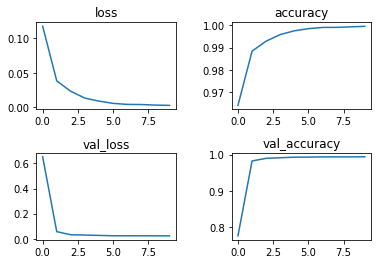

In [96]:
plot_model(history_5)